## MNIST handwritten digits prediction

The MNIST (Modified National Institute of Standards and Technology) digits dataset is a widely used dataset in the field of machine learning and computer vision. It is commonly used for training and testing image processing systems, particularly in the context of handwritten digit recognition.

<img src="https://miro.medium.com/max/800/1*LyRlX__08q40UJohhJG9Ow.png" align="left" width="600">

### Import Python libraries

In [1]:
# Libraries
import os
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set TensorFlow log level to suppress warnings
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# TensorFlow and Keras
from tensorflow import keras
from tensorflow.keras import layers

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/Neural_Networks


### Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# The data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Show single handwritten digits

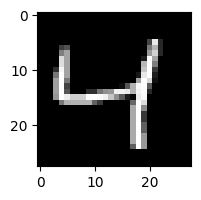

In [3]:
# Show single digit image
image  = X_train[2] # Change index in [] to show other digits
fig    = plt.figure(figsize=(2,2))
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
# Show shape of single digit image
X_train[2].shape

(28, 28, 1)

### Initialize the model 

In [5]:
# Linear stack of layers
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# model.summary()

### Train the model

In [6]:
# Define batch size and epochs
batch_size = 128
epochs = 5

# Compile the model
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# Train the model
model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs,
          validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.8923 - loss: 0.3587 - val_accuracy: 0.9777 - val_loss: 0.0831
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9663 - loss: 0.1104 - val_accuracy: 0.9855 - val_loss: 0.0569
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9743 - loss: 0.0842 - val_accuracy: 0.9877 - val_loss: 0.0479
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9777 - loss: 0.0712 - val_accuracy: 0.9895 - val_loss: 0.0409
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9808 - loss: 0.0631 - val_accuracy: 0.9897 - val_loss: 0.0363


### Evaluate the trained model

In [7]:
# Calculate the test loss and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.0362
Test accuracy: 0.9878


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-11-03 07:12:02
Python Version: 3.11.14
-----------------------------------
